In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
from typing import List
import statistics as st
import scipy.stats

In [2]:
train = pd.read_csv('train_set.csv', index_col=0, sep=';').reset_index()
train.shape

(6000, 2)

In [3]:
train

,client_id,target
0,75063019,0
1,86227647,1
2,6506523,0
3,50615998,0
4,95213230,0
...,...,...
5995,71577803,0
5996,8128547,1
5997,26055781,0
5998,73504380,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  6000 non-null   int64
 1   target     6000 non-null   int64
dtypes: int64(2)
memory usage: 93.9 KB


In [5]:
train.isnull().sum()

client_id    0
target       0
dtype: int64

In [6]:
train.describe()

,client_id,target
count,6.000000e+03,6000.000000
mean,5.102984e+07,0.443333
std,2.881391e+07,0.496820
min,2.289900e+04,0.000000
25%,2.612906e+07,0.000000
50%,5.164080e+07,0.000000
75%,7.590927e+07,1.000000
max,9.999124e+07,1.000000


In [7]:
train_set = pd.read_csv('train_set.csv', index_col=0, delimiter = ";")
train_set.shape

(6000, 1)

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 75063019 to 1846496
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  6000 non-null   int64
dtypes: int64(1)
memory usage: 93.8 KB


In [9]:
train_set.describe()

,target
count,6000.000000
mean,0.443333
std,0.496820
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [10]:
transactions = pd.read_csv('transactions.csv', delimiter = ";")
transactions.shape

(130039, 5)

In [11]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130039 entries, 0 to 130038
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   client_id  130039 non-null  int64  
 1   datetime   130039 non-null  object 
 2   code       130039 non-null  int64  
 3   type       130039 non-null  int64  
 4   sum        130039 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 5.0+ MB


In [12]:
transactions.isnull().sum()

client_id    0
datetime     0
code         0
type         0
sum          0
dtype: int64

In [13]:
transactions.drop_duplicates()

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87
...,...,...,...,...,...
130034,15836839,147 11:50:53,5411,1010,-26344.59
130035,28369355,305 11:59:34,4829,2330,-24705.07
130036,40949707,398 21:13:58,5411,1110,-40353.72
130037,7174462,409 13:58:14,5411,1010,-25536.06


In [14]:
transactions.nunique()

client_id      8656
datetime     114770
code            175
type             67
sum           27450
dtype: int64

In [15]:
codes = pd.read_csv('codes.csv', sep = ';')
codes

,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"
...,...,...
179,5044,"Офисное, фотографическое, фотокопировальное, и..."
180,5983,"Горючее топливо — уголь, нефть, разжиженный бе..."
181,5994,Дилеры по продаже печатной продукции
182,5192,"Книги, периодические издания и газеты"


In [16]:
codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   code              184 non-null    int64 
 1   code_description  184 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [17]:
codes

,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"
...,...,...
179,5044,"Офисное, фотографическое, фотокопировальное, и..."
180,5983,"Горючее топливо — уголь, нефть, разжиженный бе..."
181,5994,Дилеры по продаже печатной продукции
182,5192,"Книги, периодические издания и газеты"


In [18]:
codes.isnull().sum()

code                0
code_description    0
dtype: int64

In [19]:
codes.describe()

,code
count,184.000000
mean,6046.793478
std,1470.328104
min,742.000000
25%,5208.250000
50%,5813.500000
75%,7283.000000
max,9402.000000


In [20]:
codes.mean()

C:\Users\satk8\AppData\Local\Temp/ipykernel_20476/536127057.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  codes.mean()


code    6046.793478
dtype: float64

In [21]:
types = pd.read_csv('types.csv', delimiter = ";")
types.shape

(155, 2)

In [22]:
types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   type              155 non-null    int64 
 1   type_description  155 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [23]:
types

,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....
...,...,...
150,4110,Плата за получение наличных в АТМ.
151,2320,Безналичный перевод денежных средств через POS
152,7040,Перевод на карту (с карты) через POS (в предел...
153,2433,Перевод с карты на счет физ.лица в другом банк...


In [24]:
types.isnull().sum()

type                0
type_description    0
dtype: int64

In [25]:
types.describe()

,type
count,155.000000
mean,10819.045161
std,80000.258847
min,1000.000000
25%,2385.500000
50%,4040.000000
75%,7027.500000
max,999999.000000


In [26]:
transactions.mode(axis='rows', numeric_only=True)

,client_id,code,type,sum
0,70780820,6011,1010,-2245.92



# What is the Mean Expense of a Household

In [27]:
transactions["sum"].mean()

-18129.09389314057

# What is the Median Household Expense?

In [28]:
transactions["sum"].median()

-5502.49

# Calculate Standard Deviation for first 4 columns.¶


In [29]:
pd.DataFrame(transactions.iloc[:,0:5].std().to_frame())


C:\Users\satk8\AppData\Local\Temp/ipykernel_20476/2292912211.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(transactions.iloc[:,0:5].std().to_frame())


,0
client_id,2.872854e+07
code,6.060871e+02
type,2.253297e+03
sum,5.584445e+05




# Calculate Variance for last SUM column.¶


In [30]:
pd.DataFrame(transactions.iloc[:,4:5].var().to_frame()).T

,sum
0,3.118603e+11


# Plot the Histogram to count the TYPE in TRANSACTIONS¶


<AxesSubplot:>

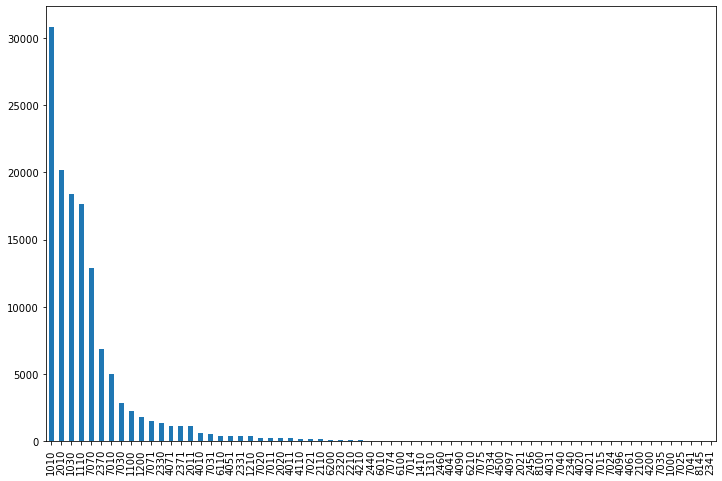

In [31]:
transactions["type"].value_counts().plot(kind="bar", figsize=(12,8))

In [32]:
merged_table = transactions.merge(codes,on='code',how='left')
merged_table

,client_id,datetime,code,type,sum,code_description
0,96372458,421 06:33:15,6011,2010,-561478.94,Финансовые институты — снятие наличности автом...
1,24567813,377 17:20:40,6011,7010,67377.47,Финансовые институты — снятие наличности автом...
2,21717441,55 13:38:47,6011,2010,-44918.32,Финансовые институты — снятие наличности автом...
3,14331004,263 12:57:08,6011,2010,-3368873.66,Финансовые институты — снятие наличности автом...
4,85302434,151 10:34:12,4814,1030,-3368.87,"Звонки с использованием телефонов, считывающих..."
...,...,...,...,...,...,...
130034,15836839,147 11:50:53,5411,1010,-26344.59,"Бакалейные магазины, супермаркеты"
130035,28369355,305 11:59:34,4829,2330,-24705.07,Денежные переводы
130036,40949707,398 21:13:58,5411,1110,-40353.72,"Бакалейные магазины, супермаркеты"
130037,7174462,409 13:58:14,5411,1010,-25536.06,"Бакалейные магазины, супермаркеты"


In [33]:
merged_table = merged_table.merge(types,on='type',how='left')
merged_table

,client_id,datetime,code,type,sum,code_description,type_description
0,96372458,421 06:33:15,6011,2010,-561478.94,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ
1,24567813,377 17:20:40,6011,7010,67377.47,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке)
2,21717441,55 13:38:47,6011,2010,-44918.32,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ
3,14331004,263 12:57:08,6011,2010,-3368873.66,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ
4,85302434,151 10:34:12,4814,1030,-3368.87,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы
...,...,...,...,...,...,...,...
130034,15836839,147 11:50:53,5411,1010,-26344.59,"Бакалейные магазины, супермаркеты",Покупка. POS
130035,28369355,305 11:59:34,4829,2330,-24705.07,Денежные переводы,Списание с карты по операции “перевода с карты...
130036,40949707,398 21:13:58,5411,1110,-40353.72,"Бакалейные магазины, супермаркеты",Покупка. POS
130037,7174462,409 13:58:14,5411,1010,-25536.06,"Бакалейные магазины, супермаркеты",Покупка. POS


In [34]:
merged_table.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,130039.0,5.086859e+07,2.872854e+07,22899.00,25771743.00,52358368.00,75063019.00,99999680.00
code,130039.0,5.594630e+03,6.060871e+02,742.00,5211.00,5641.00,6010.00,9402.00
type,130039.0,2.489372e+03,2.253297e+03,1000.00,1030.00,1110.00,2370.00,8145.00
sum,130039.0,-1.812909e+04,5.584445e+05,-41500301.14,-22449.16,-5502.49,-1122.96,67377473.16


In [35]:
merged_table.isna().any()

client_id           False
datetime            False
code                False
type                False
sum                 False
code_description    False
type_description     True
dtype: bool

In [36]:
NaN_val = merged_table.isnull()
row_has_NaN_val = NaN_val.any(axis=1)
rows_with_NaN = merged_table[row_has_NaN_val]
rows_with_NaN

,client_id,datetime,code,type,sum,code_description,type_description
5379,44676756,335 10:39:55,6012,2456,-202132.42,Финансовые институты — торговля и услуги,NaN
7169,50988636,446 00:00:00,6012,2460,-359346.52,Финансовые институты — торговля и услуги,NaN
12546,97376938,389 15:44:04,6012,2456,-121369.29,Финансовые институты — торговля и услуги,NaN
13062,78085289,396 10:13:25,6012,4097,-3368.87,Финансовые институты — торговля и услуги,NaN
16212,97000670,409 12:27:01,6012,4097,-3368.87,Финансовые институты — торговля и услуги,NaN
17153,36100475,343 00:00:00,6012,2460,-673774.73,Финансовые институты — торговля и услуги,NaN
21375,3568140,426 10:38:01,6012,2456,-24705.07,Финансовые институты — торговля и услуги,NaN
22038,60340891,444 21:24:56,6012,4097,-673.77,Финансовые институты — торговля и услуги,NaN
24801,60293458,431 17:32:53,6012,2456,-163951.85,Финансовые институты — торговля и услуги,NaN
27974,54186907,287 00:00:00,6012,2460,-336887.37,Финансовые институты — торговля и услуги,NaN


In [37]:
merged_table["sum"].std()

558444.5224348905

In [38]:
merged_table["sum"].median()

-5502.49

In [39]:
merged_table.dropna(inplace=True)
merged_table.isna().any()


client_id           False
datetime            False
code                False
type                False
sum                 False
code_description    False
type_description    False
dtype: bool

In [40]:
merged_table.isnull()

,client_id,datetime,code,type,sum,code_description,type_description
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
130034,False,False,False,False,False,False,False
130035,False,False,False,False,False,False,False
130036,False,False,False,False,False,False,False
130037,False,False,False,False,False,False,False


# Explanatory data analysis. Exploring the features, visualizations etc.

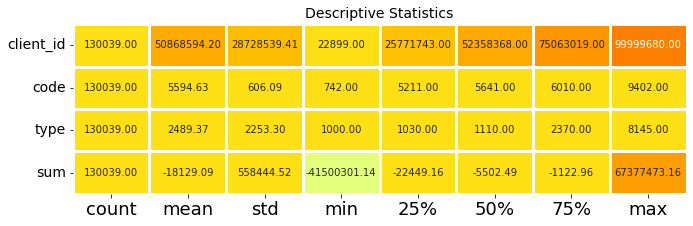

In [41]:
def desc_stats(dataframe):
    desc = dataframe.describe().T
    desc_df = pd.DataFrame(index= dataframe.columns, 
                           columns= desc.columns,
                           data= desc)
    
    f,ax = plt.subplots(figsize=(11, desc_df.shape[0]*0.78))
    sns.heatmap(desc_df,
                annot=True,
                cmap = "Wistia",
                fmt= '.2f',
                ax=ax,
                linecolor='white',
                linewidths = 1.3,
                cbar = False,
                annot_kws={"size": 10})
    plt.xticks(size = 18)
    plt.yticks(size = 14, rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()

desc_stats(transactions[[col for col in transactions.columns if transactions[col].dtype != 'O']])

# Find the percentage of gender by pie chart


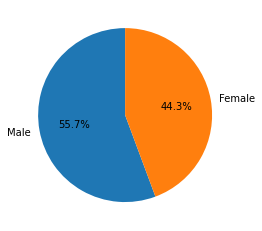

In [42]:
x = train['target'].value_counts()

plt.pie(x, labels=['Male', 'Female'], startangle=90, autopct='%.1f%%');

In [43]:
merged_table['days'] = merged_table.datetime.str[:-9]

In [44]:
merged_table

,client_id,datetime,code,type,sum,code_description,type_description,days
0,96372458,421 06:33:15,6011,2010,-561478.94,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,421
1,24567813,377 17:20:40,6011,7010,67377.47,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке),377
2,21717441,55 13:38:47,6011,2010,-44918.32,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,55
3,14331004,263 12:57:08,6011,2010,-3368873.66,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,263
4,85302434,151 10:34:12,4814,1030,-3368.87,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы,151
...,...,...,...,...,...,...,...,...
130034,15836839,147 11:50:53,5411,1010,-26344.59,"Бакалейные магазины, супермаркеты",Покупка. POS,147
130035,28369355,305 11:59:34,4829,2330,-24705.07,Денежные переводы,Списание с карты по операции “перевода с карты...,305
130036,40949707,398 21:13:58,5411,1110,-40353.72,"Бакалейные магазины, супермаркеты",Покупка. POS,398
130037,7174462,409 13:58:14,5411,1010,-25536.06,"Бакалейные магазины, супермаркеты",Покупка. POS,409


In [45]:
altosh = merged_table['days'].value_counts()
altosh.head(30)

448    434
440    405
410    404
441    398
314    398
287    395
426    390
301    386
399    383
434    382
322    381
333    381
406    380
252    378
455    373
447    373
280    371
293    370
272    369
343    367
392    367
286    366
418    366
313    364
431    364
453    361
364    361
405    360
336    359
284    359
Name: days, dtype: int64

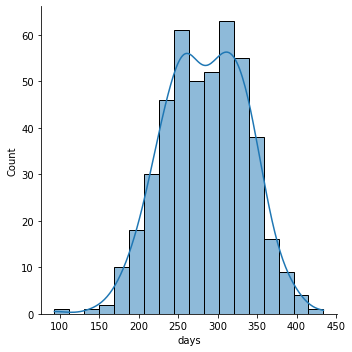

In [46]:
sns.displot(data=altosh,  kde=True)

<AxesSubplot:>

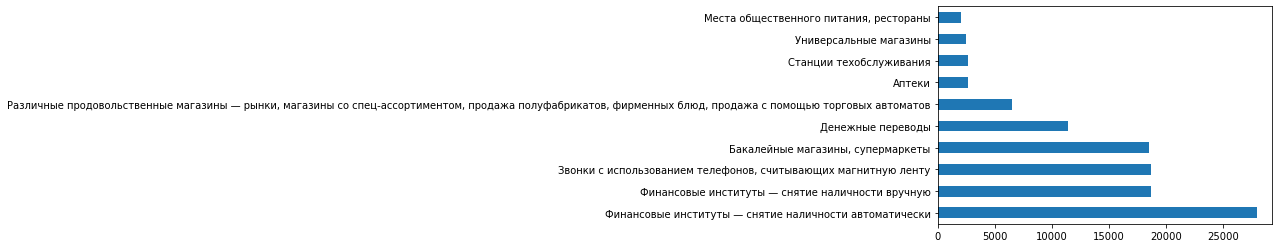

In [47]:
merged_table['code_description'].value_counts()[0:10].plot.barh()

<AxesSubplot:>

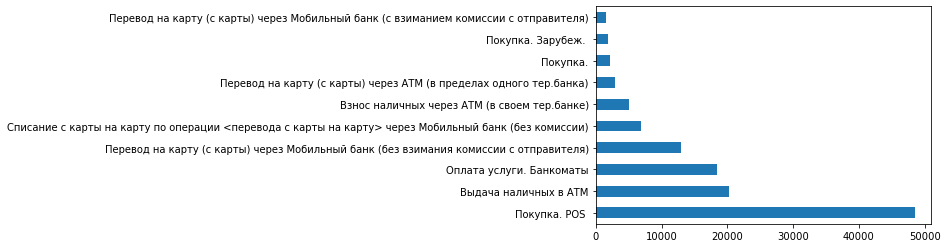

In [48]:
merged_table['type_description'].value_counts()[0:10].plot.barh()

<AxesSubplot:>

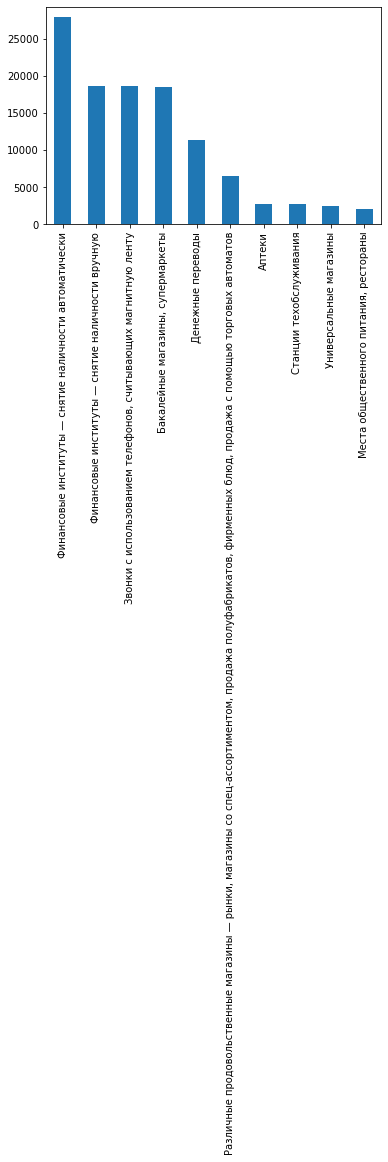

In [49]:
merged_table['code_description'].value_counts()[0:10].plot(kind='bar')

In [50]:
#sns.pairplot(merged_table)

In [51]:
merged_table['days'] = merged_table['days'].astype('int')

In [52]:
merged_table.corr()

,client_id,code,type,sum,days
client_id,1.000000,0.003058,0.023086,0.003380,-0.003368
code,0.003058,1.000000,0.322596,0.046632,-0.005501
type,0.023086,0.322596,1.000000,0.137752,0.005361
sum,0.003380,0.046632,0.137752,1.000000,-0.000105
days,-0.003368,-0.005501,0.005361,-0.000105,1.000000


<AxesSubplot:>

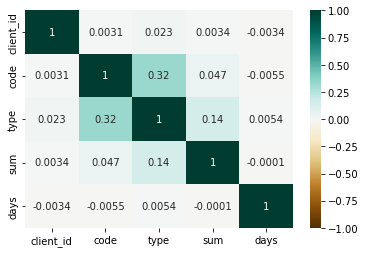

In [53]:
sns.heatmap(merged_table.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [54]:
merged_table_num = merged_table[['code','type','sum','days']] #numerical data
merged_table_cat = merged_table[['code_description','type_description']] #cathegorical data

<AxesSubplot:>

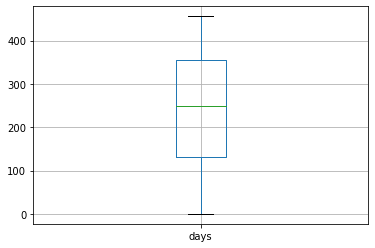

In [55]:
merged_table.boxplot(column = ['days'])

<AxesSubplot:>

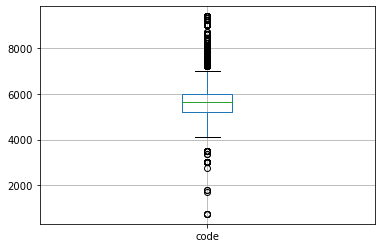

In [56]:
merged_table.boxplot(column = ['code'])

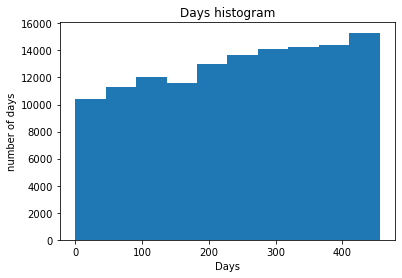

In [57]:
fig, ax = plt.subplots(1, 1)
ax.hist(merged_table['days'], bins = 10)

ax.set_title("Days histogram")
ax.set_xlabel('Days')
ax.set_ylabel('number of days')
plt.show()

# 3. Feature Engineering

### RFM method:

New dataframe which contains clients

In [58]:
client_id_list = list(transactions['client_id'].unique())
clients = pd.DataFrame(client_id_list, columns=['client_id'])
clients.head(5)

,client_id
0,96372458
1,24567813
2,21717441
3,14331004
4,85302434


To calculate **recency** we can split column 'datetime' into 2 column: day and time

In [59]:
merged_table['time'] = transactions.datetime.apply(lambda x: pd.Series(str(x).split(" ")))[1]
merged_table.head(5)

,client_id,datetime,code,type,sum,code_description,type_description,days,time
0,96372458,421 06:33:15,6011,2010,-561478.94,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,421,06:33:15
1,24567813,377 17:20:40,6011,7010,67377.47,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке),377,17:20:40
2,21717441,55 13:38:47,6011,2010,-44918.32,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,55,13:38:47
3,14331004,263 12:57:08,6011,2010,-3368873.66,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,263,12:57:08
4,85302434,151 10:34:12,4814,1030,-3368.87,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы,151,10:34:12


In [60]:
recent_day = max(merged_table['days'])
print(recent_day)

456


The recent transaction was made at 456-th day. Then, we will subtract each day in the data frame from this value to calculate the other 'recencies'.

In [61]:
days = pd.DataFrame(merged_table.groupby('client_id')['days'].max()).reset_index() #finding the latest transaction
merged_days = pd.merge(clients, days)
merged_days['recency'] = recent_day - merged_days['days']
clients['recency'] = merged_days['recency']
clients.head(5)

,client_id,recency
0,96372458,8
1,24567813,57
2,21717441,8
3,14331004,5
4,85302434,40


To calculate **frequency** we will count number of transactions of each client

In [62]:
frequency = pd.DataFrame(merged_table.groupby('client_id')['datetime'].count()).reset_index()
merged_frequency = pd.merge(clients, frequency).rename(columns={'datetime':'frequency'})
clients['frequency'] = merged_frequency['frequency']
clients.head(5)

,client_id,recency,frequency
0,96372458,8,13
1,24567813,57,14
2,21717441,8,15
3,14331004,5,23
4,85302434,40,8


For **monetary value** we will sum all transactions for each client.

In [63]:
summary = pd.DataFrame(merged_table.groupby('client_id')['sum'].sum()).reset_index()
merged_summary = pd.merge(clients, summary).rename(columns={'sum':'monetary_value'})
clients['monetary_value'] = merged_summary['monetary_value']
clients_df = clients
clients.head(5)

,client_id,recency,frequency,monetary_value
0,96372458,8,13,-1102812.03
1,24567813,57,14,-488237.85
2,21717441,8,15,-3135792.54
3,14331004,5,23,-5893527.32
4,85302434,40,8,-101501.02


RFM technique is convenient for data preparation and feature engineering done prior to application of a clustering algorithm. Now we have three defined features that can be used to categorize the clients into different groups based on their indicators. 

These features hold the following meaning:
1. The smallest recency indicates the best clients since the newest transactions are better and it implies that the client is probably still using the services. The biggest recency(the oldest transactions) is the worst option indicating a possible loss of a customer.
2. The highest frequency demonstrates the best clients who complete transactions regularly. The lowest frequency shows the most inactive customers or people who have completed a couple of random transactions. The latter may also be considered as a lost customer not holding much value in a dataset.
3. The biggest absolute values from monetary_values column indicate the best clients with high financial value in a dataset(the transactions may be positive or negative numbers, that's why we use their absolute values). The smallest monetary values imply the smallest significance of clients generally in a dataset.

### Part 2:

after researching datasets, we found out that 'types' dataframe has 'н/д' values, which are NaN

In [64]:
nan_values = types[types['type_description'].str.contains('н/д')]
types.drop(types[types['type_description'].str.contains('н/д')].index, inplace=True)
list_types = nan_values['type'].tolist()
merged_table.loc[merged_table['type'].isin(list_types), 'type'] = 4035

In second part we will create features for clustering.

In [65]:
types = transactions.join(types.set_index('type'), on='type')
types.drop(['datetime', 'code', 'type', 'sum'], axis = 1, inplace = True)
types

,client_id,type_description
0,96372458,Выдача наличных в АТМ
1,24567813,Взнос наличных через АТМ (в своем тер.банке)
2,21717441,Выдача наличных в АТМ
3,14331004,Выдача наличных в АТМ
4,85302434,Оплата услуги. Банкоматы
...,...,...
130034,15836839,Покупка. POS
130035,28369355,Списание с карты по операции “перевода с карты...
130036,40949707,Покупка. POS
130037,7174462,Покупка. POS


After that, we grouped type_description by client_id to find out which transactions the client used as a whole. Based on this data, it will be possible to classify customers.

In [66]:
group_type_desc = types.groupby(['client_id'])['type_description'].apply(lambda x: ' '.join([str(i) for i in x])).reset_index()
group_type_desc.head(5)

,client_id,type_description
0,22899,Наличные. АТМ Плата за получение наличных в ...
1,27914,Взнос наличных через АТМ (в своем тер.банке) О...
2,28753,Покупка. POS Оплата услуги. Банкоматы Покупка...
3,31385,Покупка. POS Выдача наличных в АТМ Выдача нал...
4,38084,Списание с карты на карту по операции <перевод...


The algorithm associated with hierarchical clustering is quite voluminous and unfortunately, our virtual environment cannot withstand such a scale. But nevertheless, to test our code, we decided to select a specific sample from our dataset to check the correctness of the written algorithm and check the clients from this sample 

In [67]:
df1 = group_type_desc.iloc[:2000,:]
df2 = group_type_desc.iloc[2001:,:]

For 'types' dataset:

In [68]:
#lines = df1['type_description'].to_list()

In [69]:
#lins = np.array([])
#for line in lines:
#    lins = np.append(lins, line)
#for x in range(len(lins)):
#    lins[x] = lins[x].lower()
#words_per_text = np.zeros((2000,), dtype=object)
#count=0
#for line in lins:
#    words_per_sentence = np.array([])
 #   word = re.split('[^абвгдеёжзийклмнопрстуфхцчшщъыьэюя]',line)
  #  word = [i for i in word if i != '']
   # words_per_sentence = np.append(words_per_sentence,word)
    #words_per_text[count] = words_per_sentence
    #count += 1

In [70]:
#unique_words = np.array([])
#for sentence in words_per_text:
 #   unique_words = np.concatenate((unique_words,sentence))
#unique_words = np.unique(unique_words)
#print(unique_words)

In [71]:
#client = df1.groupby('client_id').count()
#client['client_id'] = client.index
#ln = client['client_id'].to_list()

In [72]:
#matrix = pd.DataFrame(columns=unique_words,index=ln)
#for line in range(2000):
 #   for word in range(52):
 #       count = (words_per_text[line]==unique_words[word]).sum()
  #      matrix.iloc[line,word] = count
#matrix

# Supervised learning

Preparing for supervised learning

In [73]:
merged_table = transactions.merge(train,on='client_id',how='left')
merged_table.dropna(inplace=True)
merged_table['day'] = transactions.datetime.apply(lambda x: pd.Series(str(x).split(" ")))[0]
merged_table.drop(['datetime'],axis=1,inplace=True)
df_new = merged_table

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt


#Standardizing features
scaler = StandardScaler()
scaler.fit(df_new.drop('target', axis=1))
scaled_features = scaler.transform(df_new.drop('target', axis=1))
scaled_features

array([[ 1.57323554,  0.6884737 , -0.23501079, -0.87417515,  1.36698954],
       [-1.05552774,  0.6884737 , -0.23501079, -0.04532599, -1.44433108],
       [ 1.18343625, -1.29943102, -0.66192027,  0.02134232, -0.70693551],
       ...,
       [-0.3783184 , -0.30796977, -0.62707051, -0.03800185,  1.19032185],
       [-1.56761722, -0.30796977, -0.67063271, -0.01422612,  1.27481509],
       [ 1.42623561, -0.1053596 , -0.62707051,  0.00728791,  0.58350674]])

In [75]:
df_fit = pd.DataFrame(scaled_features, columns=merged_table.columns[:-1])
df_fit.head()

,client_id,code,type,sum,target
0,1.573236,0.688474,-0.235011,-0.874175,1.366990
1,-1.055528,0.688474,-0.235011,-0.045326,-1.444331
2,1.183436,-1.299431,-0.661920,0.021342,-0.706936
3,-0.713832,-0.307970,-0.627071,0.024225,1.190322
4,1.166690,0.686813,1.969236,0.035822,1.382352


## KNN

In [76]:
X = df_fit
y = df_new['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
knn = KNeighborsClassifier(n_neighbors=5) # k=5
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
y_pred = knn.predict(X_test)
pred

array([1., 1., 0., ..., 1., 1., 1.])

In [80]:
print (confusion_matrix(y_test, pred))
print (classification_report(y_test, pred))
print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

[[5707 3715]
 [3863 5081]]
              precision    recall  f1-score   support

         0.0       0.60      0.61      0.60      9422
         1.0       0.58      0.57      0.57      8944

    accuracy                           0.59     18366
   macro avg       0.59      0.59      0.59     18366
weighted avg       0.59      0.59      0.59     18366

Accuracy Score: 0.5873897419144071


With grid search:

In [81]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [82]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'n_neighbors': 4}
Accuracy for our training dataset with tuning is : 58.06%


In [83]:
#Checking Accuracy on Test Data

knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_test, y_test)

knn_pred = knn.predict(X_test)

test_accuracy=accuracy_score(y_test,knn_pred)*(100)

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy))

C:\Users\satk8\.anaconda\navigator\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for our testing dataset with tuning is : 72.69%


In [84]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
error_rate

[0.4998186119356643,
 0.4942083357895312,
 0.4995890426667394,
 0.49555740951802796,
 0.49945158452423505,
 0.49614833782137163,
 0.49933396570126737,
 0.49655079258911644,
 0.49927303064840456,
 0.4968412969109041,
 0.49918942208749983,
 0.4969645841108823,
 0.49907463745303743,
 0.4971162131959129,
 0.4990930596783215,
 0.4972522542441647,
 0.49901511949442723,
 0.49722674654761745,
 0.4989130887082384,
 0.49728768160048026,
 0.49885640493813355,
 0.49725083714991203,
 0.49875295705769207,
 0.49732736023955365,
 0.49875720834044995,
 0.49728768160048026,
 0.49868351943931355,
 0.4973642046901219,
 0.4986055792554193,
 0.4973557021246061,
 0.4986112476324298,
 0.49739396366942695,
 0.49850921684624094,
 0.49740530042344794,
 0.4985432271083039,
 0.49741805427172153,
 0.4984525330761361,
 0.49739821495218484,
 0.49839443221177854]

Text(0, 0.5, 'Mean error rate')

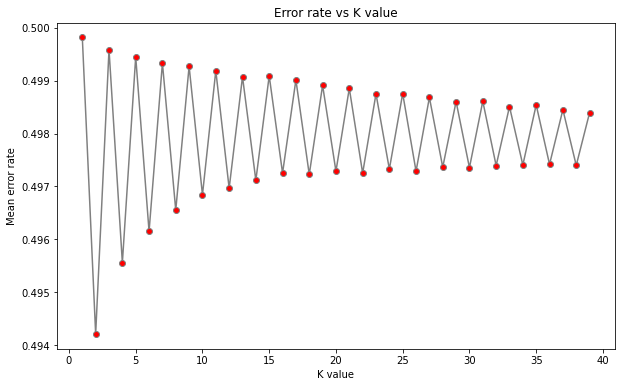

In [85]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='grey', marker='o', markerfacecolor='red')
plt.title('Error rate vs K value')
plt.xlabel('K value')
plt.ylabel('Mean error rate')

In [86]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_test, y_test)
knn_pred = knn.predict(X_test)
test_accuracy=accuracy_score(y_test,knn_pred)*(100)

print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))
print ('Accuracy Score: ' + str(test_accuracy))

C:\Users\satk8\.anaconda\navigator\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[7492 1930]
 [2085 6859]]
              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79      9422
         1.0       0.78      0.77      0.77      8944

    accuracy                           0.78     18366
   macro avg       0.78      0.78      0.78     18366
weighted avg       0.78      0.78      0.78     18366

Accuracy Score: 78.13895241206578


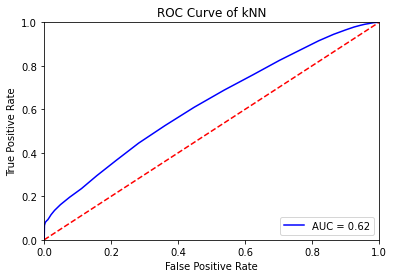

In [87]:
X = df_fit
y = merged_table['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=37)
knn.fit(X_train,y_train)

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

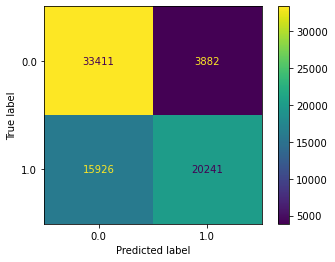

In [88]:
plot_confusion_matrix(grid,X_train, y_train,values_format='d' )

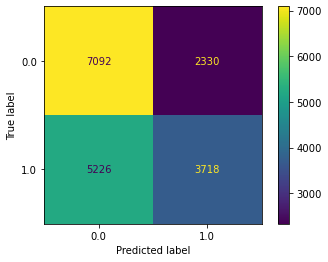

In [89]:
plot_confusion_matrix(grid,X_test, y_test,values_format='d' )

## Random Forest

In [90]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [109]:
parameters = {'max_depth':range(3,20)}
rf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=4)
rf.fit(X=X, y=y)
rf_model = rf.best_estimator_
print (rf.best_score_, rf.best_params_)

0.6856445676573198 {'max_depth': 19}


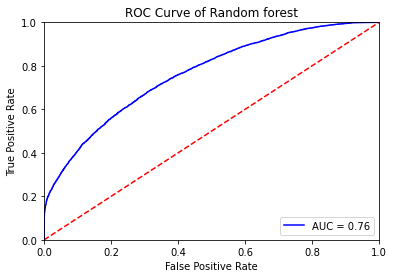

In [115]:
rf = RandomForestClassifier(max_depth=19, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_scores = rf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random forest')
plt.show()

In [107]:
print (confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))
print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

[[6873 2549]
 [3247 5697]]
              precision    recall  f1-score   support

         0.0       0.68      0.73      0.70      9422
         1.0       0.69      0.64      0.66      8944

    accuracy                           0.68     18366
   macro avg       0.69      0.68      0.68     18366
weighted avg       0.68      0.68      0.68     18366

Accuracy Score: 0.6844168572361973


In [94]:
forest_tuned = RandomForestClassifier(n_estimators=100,
                                      criterion= 'gini',
                                      bootstrap= False,
                                      max_depth= 10,
                                      max_features= 'auto',
                                      min_samples_split= 20,
                                      min_samples_leaf= 1,
                                      random_state=42)
forest_tuned.fit(X_train, y_train)
y_pred = forest_tuned.predict(X_test)

In [95]:
print (confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))
print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

[[6340 3082]
 [3617 5327]]
              precision    recall  f1-score   support

         0.0       0.64      0.67      0.65      9422
         1.0       0.63      0.60      0.61      8944

    accuracy                           0.64     18366
   macro avg       0.64      0.63      0.63     18366
weighted avg       0.64      0.64      0.63     18366

Accuracy Score: 0.635249918327344


# Decision Tree

In [96]:
from sklearn import metrics
from sklearn.metrics import classification_report as report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score,roc_curve,auc
y_pred_tree = tree.predict(X_test)
scores_accur = cross_val_score(tree, X_train, y_train, cv=2)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_accur.mean(), scores_accur.std() * 2))
scores_f1 = cross_val_score(tree, X_train, y_train, cv=5, scoring='f1_macro')
print("F1 Score: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2))

Accuracy: 0.72 (+/- 0.02)
F1 Score: 0.77 (+/- 0.03)


In [97]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(report(y_test,y_pred))
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80      9422
         1.0       0.79      0.80      0.80      8944

    accuracy                           0.80     18366
   macro avg       0.80      0.80      0.80     18366
weighted avg       0.80      0.80      0.80     18366

Accuracy score: 0.7999564412501361


In [98]:
max_features_range = np.arange(1,6,1)
max_depth_range = np.arange(2,22,2)
param_grid = dict(max_features = max_features_range, max_depth = max_depth_range)
grid = GridSearchCV(clf,param_grid)

In [99]:
clf.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [100]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
                         'max_features': array([1, 2, 3, 4, 5])})

In [113]:
print('Best parameter:',grid.best_params_)
print('Best score:',grid.best_score_)

Best parameter: {'max_depth': 20, 'max_features': 5}
Best score: 0.6787367274707323


In [102]:
roc_auc_score(y,clf.predict_proba(X)[:,1])

0.9599864672409743

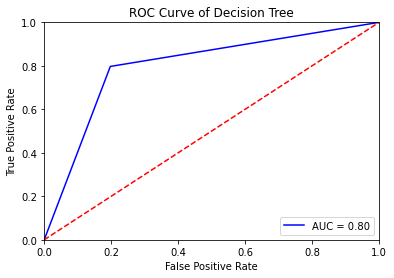

In [103]:
y_scores = clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision Tree')
plt.show()

# Analyze and Result Comparison

In [104]:
d = {'Best Accuracy' : [62, 68, 82], 'Recall': [68, 72, 52], 'Precision': [61, 68, 53], 'Parameter 1': ['Max depth: 10', 'Max depth: 19', 'Max depth: 20'], 'Parameter 2': ['Max features: auto', 'N estimators: 100', 'Max features:5'], 'ROC/AUC': [0.76,0.62,0.96]}

In [105]:
data = pd.DataFrame(data=d, index=['KNN', 'Random Forest', 'Decision Tree'])
data

,Best Accuracy,Recall,Precision,Parameter 1,Parameter 2,ROC/AUC
KNN,64,68,61,Max depth: 10,Max features: auto,0.76
Random Forest,68,72,68,Max depth: 19,N estimators: 100,0.62
Decision Tree,82,52,53,Max depth: 20,Max features:5,0.96


# Conclusion

In order to segment the customers into multiple clusters, we worked with datasets of transactions, codes, and categories. The first stage was to prepare the data, which included handling null and duplicate entries as well as performing descriptive statistics to acquire a basic understanding of our data. Then, using representations of the features, we ran explanatory data analysis and developed new features to use for unsupervised learning. After we build model for prediction the gender of the clients. We used Decision Trees, KNN, Random Forest. Tune the hyper parameters, grid search, cross validation etc. Visualization of the models etc.